# Preparação dos Dados:

In [1]:
# Libraries:
import pandas as pd
import numpy as np
import missingno as msno
from pandas_profiling import ProfileReport
from IPython.display import display

In [2]:
# Reading 2019 Data in raw format:
raw_data = pd.read_excel('/Users/rafaelalvesferreira/Docs_locais/Projetos/vigitel_predictions/data/raw/Vigitel-2019-peso-rake.xls')
raw_data.head()

,chave,replica,ano,cidade,q6,q7,q8a,q8b,q8_anos,q9,...,papatres,hart,diab,ind_med_has,med_has,trat_med_has,ind_med_db,med_db,insulina,trat_med_db
0,311666031,29,2019,27,88,1,1,3.0,3,74,...,NaN,1,0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,318136030,4,2019,27,65,1,8,NaN,0,57,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1321836026,6,2019,10,68,1,1,3.0,3,777,...,NaN,1,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,2323676021,16,2019,10,79,1,1,3.0,3,62,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2323716024,22,2019,10,70,1,1,3.0,3,66,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Improving the Dataset readability
columns_headers = pd.read_csv('/Users/rafaelalvesferreira/Docs_locais/Projetos/vigitel_predictions/data/external/headers.csv', sep=';')
columns_headers.drop(['Unnamed: 2'], axis=1, inplace=True)
columns_headers.head()


,tabela,nome
0,chave,chave
1,replica,replica
2,ano,ano
3,cidade,cidade
4,q6,idade_anos


In [4]:
pd.options.display.max_rows = None
columns_headers.head(20)

,tabela,nome
0,chave,chave
1,replica,replica
2,ano,ano
3,cidade,cidade
4,q6,idade_anos
5,q7,sexo
6,q8a,escolaridade_grau
7,q8b,escolaridade_ano
8,q8_anos,anos_estudo
9,q9,peso_kg


In [5]:
# Creating Dict to rename all columns
headers_dict = dict(zip(columns_headers['tabela'], columns_headers['nome']))

## Criando o DataFrame para análise de dados faltantes e importancia das colunas

In [6]:
df = raw_data.rename(columns=headers_dict)

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 20
display(df)

,chave,replica,ano,cidade,idade_anos,sexo,escolaridade_grau,escolaridade_ano,anos_estudo,peso_kg,altura_cm,lembra_peso20anos,peso_20anos,gravida,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,quantasvezes,dias_por_sem_hortalica_cozida,quantasvezes,copos_suco_natural_por_dia,quantosuco,dias_por_sem_frutas,quantasvezes,dias_por_sem_refrigerante,quetipo,qtddrefrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ingere_bebida_alcoolica,5doses(homem),4doses(mulher),quantosdias,nummáximodedoses,dirigiuapósbeber,independentedaquantidade,ultimos3meses_exercicio_fisico,exercício físico tipo principal,exercício físico tipo principal outros,praticaexercicio1veznasemana,freqexercicio,duraçãoexercicio,ultimos3meses_trabalhou,andabastanteapé,carregapeso,quantosdiasfazessasatividadesnotrabalho,tempodeduraçãodasatividades/horas,tempodeduraçãodasatividades/minutos,trajetoapeoubicicleta,duraçãodotrajeto,frequenta_cursoescola,comofaztrajetocurso/escola,duraçãotrajetocurso/escola,faz_faxina,partepesada,quantosdiasdefaxinanasemana,horas_tv_por_dia,tempodefaxina/minutos,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,tempo computador_tablet_celular_tempolivre,fumante,cigarros_por_dia,cigarros_por_sem,cigarrosdiário(agrupamentoemfaixas),cigarrossemanal(agrupamentoemfaixas),idadeinÍcio(anos),tentouparar,ex_fumante,contatoc/fumoemcasa,contatoc/fumonotrabalho,trabalhaemlocalfechado,ultimavezcomproucigarro/maco/pacote,qtd_cigarro,qtd_cigarro,qtd_cigarro,qtd_cigarro,qtd_cigarro,qtd_cigarro,quantopagounacompra,cigarro_eletronico,cor,cor_outra,estado_conjugal_atual,outrofone,quantos,estado_de_saude,pressao_alta,medico_receitou_medicamento_pressao_alta,medicamento,ondeconseguemedicaçãopressão,nosultimos30diasficousemmedicacaopressao,ultima_afericao_pressao_arterial,diabetes,diabetesapenasnagravidez,idadedoíniciododiabetes,medico_receitou_medicamento_diabetes,comprimidodiabetes,onde consegue medicação diabetes,"nos ultimos 30 dias, ficou sem medicacao diabetes",insulinadiabetes,ondeconsegueinsulinadiabetes,"nos ultimos 30 dias, ficou sem insulina",ultima_afericao_glicemia,papanicolau,tempo,mamografia,tempo,possedeplanodesaúde,nosúltimos12mesesfoimultado?,qualolocal,passouemblitz,paradoemblitz,convidadobafometro,fezobafometro,deupositivo,nosultimos30diasusodecelularduranteaconducao,possuicelular,quantos,recebe_bolsa_familia,pessoadafamiliaquerecebebolsa,pessoa da familia que recebe bolsa_outro,haquantotemporecebebolsafamilia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,Faixa de escolaridade (RAKE),pinterno,pesorake,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMC,IMCcomimputações,Excessodepeso,Excessodepesocomimputações,Obesidade,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta

## Avaliando os dados faltantes
### Verificando as colunas com mais de 15% de itens faltantes.

In [8]:
count = df.isna().sum()
na_df = list(zip(count.index, count))
na_df = pd.DataFrame(na_df, columns=['pergunta', 'quantidade'])
na_df = na_df[na_df.quantidade > 7800]



In [9]:
pd.options.display.max_rows = None
display(na_df)

,pergunta,quantidade
12,peso_20anos,19375
13,gravida,40868
23,quantosuco,11740
27,quetipo,14773
28,qtddrefrigerante,14773
55,ingere_bebida_alcoolica,34681
56,5doses(homem),44317
57,4doses(mulher),45634
58,quantosdias,45734
59,nummáximodedoses,45734


In [9]:
drop_list = na_df.pergunta.to_list()
drop_list

['peso_20anos',
 'gravida',
 'quantosuco',
 'quetipo',
 'qtddrefrigerante',
 'ingere_bebida_alcoolica',
 '5doses(homem)',
 '4doses(mulher)',
 'quantosdias',
 'nummáximodedoses',
 'dirigiuapósbeber',
 'independentedaquantidade',
 'exercício físico tipo principal',
 'exercício físico tipo principal outros',
 'praticaexercicio1veznasemana',
 'freqexercicio',
 'duraçãoexercicio',
 'andabastanteapé',
 'carregapeso',
 'quantosdiasfazessasatividadesnotrabalho',
 'tempodeduraçãodasatividades/horas',
 'tempodeduraçãodasatividades/minutos',
 'trajetoapeoubicicleta',
 'duraçãodotrajeto',
 'comofaztrajetocurso/escola',
 'duraçãotrajetocurso/escola',
 'partepesada',
 'quantosdiasdefaxinanasemana',
 'horas_tv_por_dia',
 'tempodefaxina/minutos',
 'tempo computador_tablet_celular_tempolivre',
 'cigarros_por_dia',
 'cigarros_por_sem',
 'cigarrosdiário(agrupamentoemfaixas)',
 'cigarrossemanal(agrupamentoemfaixas)',
 'idadeinÍcio(anos)',
 'tentouparar',
 'contatoc/fumonotrabalho',
 'trabalhaemlocalfechad

In [10]:
# Removendo as colunas:
df.drop(drop_list, axis=1, inplace=True)

<AxesSubplot:>

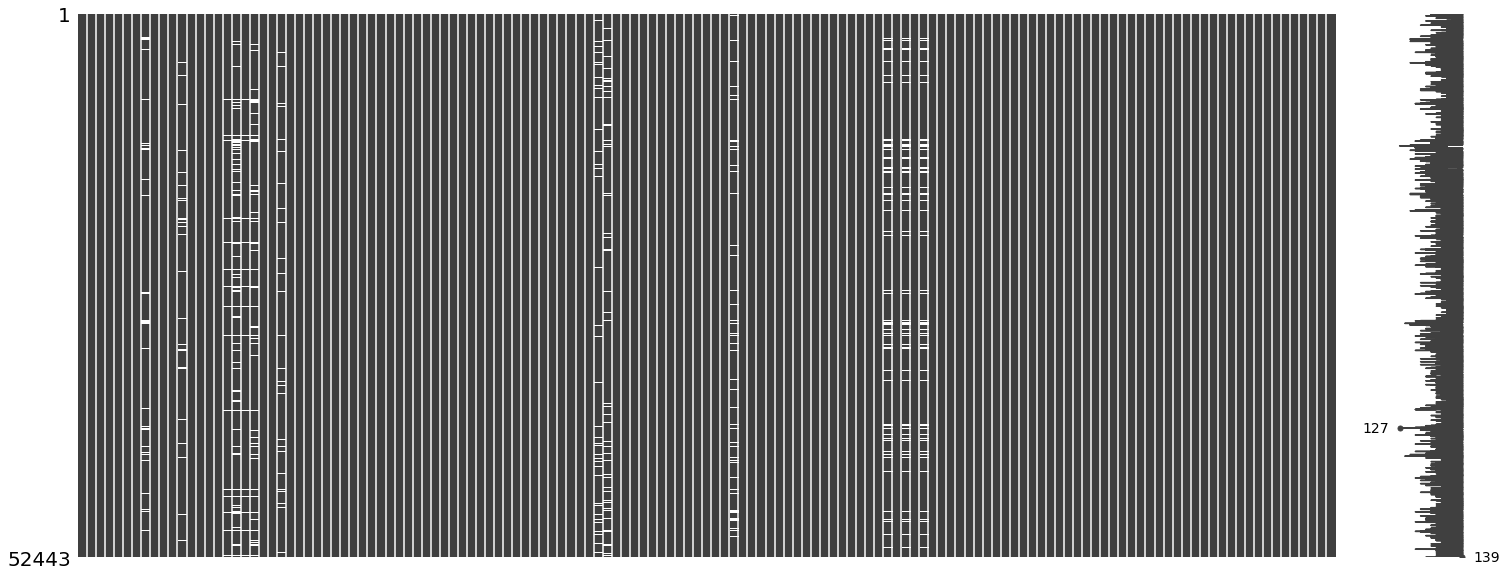

In [11]:
msno.matrix(df)

### Removendo fatores que estão relacionados a trânsito e outros marcadores.

In [12]:
df.reset_index(inplace=True)

In [13]:
counter = 0
for i in df.columns:
    print(f'{counter}: {i}')
    counter += 1

0: index
1: chave
2: replica
3: ano
4: cidade
5: idade_anos
6: sexo
7: escolaridade_grau
8: escolaridade_ano
9: anos_estudo
10: peso_kg
11: altura_cm
12: lembra_peso20anos
13: possui_cnh
14: dirige
15: dias_por_sem_feijao
16: dias_por_sem_hortalica
17: dias_por_sem_hortalica_crua
18: quantasvezes
19: dias_por_sem_hortalica_cozida
20: quantasvezes
21: copos_suco_natural_por_dia
22: dias_por_sem_frutas
23: quantasvezes
24: dias_por_sem_refrigerante
25: ontem_alface_couve_brocolis_agriao_espinafre
26: ontem_abobora_cenoura_batata-doce_quiabo
27: ontem_mamao_manga_melao_amarelo_pequi
28: ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba
29: ontem_laranja_banana_maca_abacaxi
30: ontem_arroz_macarrao_polenta_cuscuz_milho_verde
31: ontem_feijao_ervilh_lentilha_graodebico
32: ontem_batata_comum_mandioca_cara_inhame
33: ontem_carneboi_porco_frango_peixe
34: ontem_ovo_frito_cozido_mexido
35: ontem_leite
36: ontem_amendoim_castanhacaju_castanhapara
37: ontem_refrigerante
38: ontem_suco_cai

In [14]:
drop_list_transito = [0, 1, 2, 3, 18, 20, 23, 63, 64, 71, 72, 73, 80, 81, 82, 135, 136]

In [15]:
for i in drop_list_transito:
    print(df.columns[i])

index
chave
replica
ano
quantasvezes
quantasvezes
quantasvezes
outrofone
quantos
passouemblitz
possuicelular
quantos
Faixa de escolaridade (RAKE)
pinterno
pesorake
ConduçãodeveículoapósconsumoABUSIVOdebebidaalcoólica
Conduçãodeveículoapósconsumobebidaalcoólica


In [16]:
df.drop(df.columns[drop_list_transito], axis=1, inplace=True)

In [17]:
pd.options.display.max_rows = 20
display(df)

,cidade,idade_anos,sexo,escolaridade_grau,escolaridade_ano,anos_estudo,peso_kg,altura_cm,lembra_peso20anos,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMC,IMCcomimputações,Excessodepeso,Excessodepesocomimputações,Obesidade,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta/dia-Semsuco,ContagemfrutaTOTAL/dia,ContagemfrutaehortaliçaTOTAL/dia,Consumorecomendadodefrutasehortaliças,Consumoregularderefrigerantes(5xoumais/Sem),Consumoregulardefeijao(5xoumais/Sem),score_sf,Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas,score_upp,Consumodecincooumaisgruposdealimentosultraprocessados,Tipo atv. fis. no tempo livre (lazer),Frequenciaderealizacaodeatv.fis.notempolivre(lazer),Tempo de realizacao de atv. fis. no tempo livre (lazer),af*freq*time (continua),Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012),Atividadefisicanodeslocamento,Atividadefisicanotrabalhodomestico,Atividadefisicanotrabalho,Inatividadefisica,Duração diária do deslocamento para trabalho (min),Duração diária do deslocamento para o escola (min),Duração diária do deslocamento para o trabalho e escola (min),Duração semanal do deslocamento para o trabalho e escola (min),Duração semanal da atividade física laboral (min),Duração semanal da atividade física doméstica(min),Atividade física >= 150min/sem em 3 domínios,Atividadefísica<=150min/semem3domínios,HábitodeassistirTV-3hrs/dia,Tempodetela(nãoTV)-3hrs/dia,quantas horas assiste tv / dia,Tempodetela(TOTAL)-3hrs/dia,Consumoabusivodealcool,Avaliaçãoruimdacondiçãodesaúde,Hipertensaoarterial,Diabetes
0,27,88,1,1,3.0,3,74,168,1.0,2,2,4,2,1.0,2.0,2,4,5,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,2,3,8.0,2.0,3,2.0,NaN,4,2,5,2,1,1,2,3,1,2,1,1,6,6,1,74,168,0,0,0,1,0,26.218821,26.218821,1.0,1,0.0,0,0,1,0,1,1,2,1,3,4,6,0,0,1,2,0,1,0,0,0.0,0.0,0.00,0,0,0,1,0,0.0,0.0,0.0,0.0,3360,0,1,0,0,0,0.0,0,0,0,1,0
1,27,65,1,8,NaN,0,57,159,1.0,2,2,4,5,1.0,5.0,3,5,3,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,3,8.0,2.0,1,NaN,2.0,4,80,2,3,2,1,2,1,3,2,2,2,6,6,1,57,159,1,0,0,0,0,22.546576,22.546576

<AxesSubplot:>

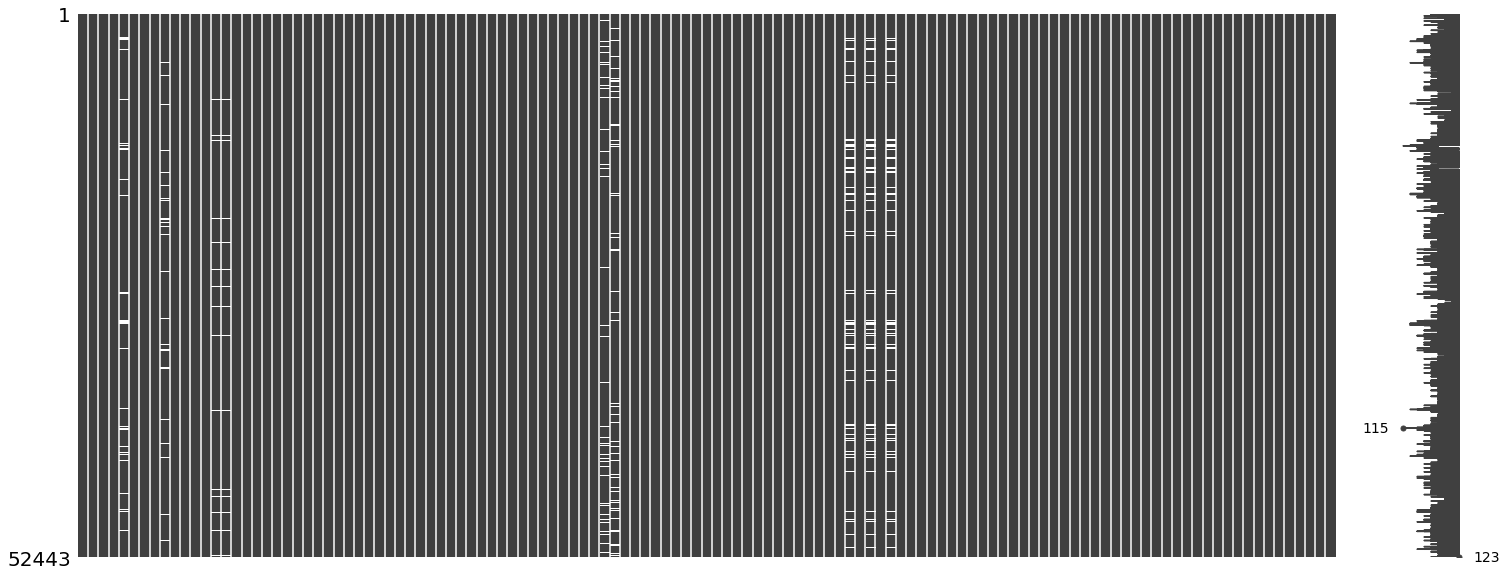

In [18]:
msno.matrix(df)

In [18]:
count = df.isna().sum()
na2_df = list(zip(count.index, count))
na2_df = pd.DataFrame(na2_df, columns=['pergunta', 'quantidade'])

In [19]:
pd.options.display.max_rows = None
display(na2_df)

,pergunta,quantidade
0,cidade,0
1,idade_anos,0
2,sexo,0
3,escolaridade_grau,0
4,escolaridade_ano,2363
5,anos_estudo,0
6,peso_kg,0
7,altura_cm,0
8,lembra_peso20anos,1796
9,possui_cnh,0


In [20]:
df.reset_index(inplace=True)

In [21]:
counter = 0
for i in df.columns:
    print(f'{counter}: {i}')
    counter += 1

0: index
1: cidade
2: idade_anos
3: sexo
4: escolaridade_grau
5: escolaridade_ano
6: anos_estudo
7: peso_kg
8: altura_cm
9: lembra_peso20anos
10: possui_cnh
11: dirige
12: dias_por_sem_feijao
13: dias_por_sem_hortalica
14: dias_por_sem_hortalica_crua
15: dias_por_sem_hortalica_cozida
16: copos_suco_natural_por_dia
17: dias_por_sem_frutas
18: dias_por_sem_refrigerante
19: ontem_alface_couve_brocolis_agriao_espinafre
20: ontem_abobora_cenoura_batata-doce_quiabo
21: ontem_mamao_manga_melao_amarelo_pequi
22: ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba
23: ontem_laranja_banana_maca_abacaxi
24: ontem_arroz_macarrao_polenta_cuscuz_milho_verde
25: ontem_feijao_ervilh_lentilha_graodebico
26: ontem_batata_comum_mandioca_cara_inhame
27: ontem_carneboi_porco_frango_peixe
28: ontem_ovo_frito_cozido_mexido
29: ontem_leite
30: ontem_amendoim_castanhacaju_castanhapara
31: ontem_refrigerante
32: ontem_suco_caixinha
33: ontem_refresco_po
34: ontem_bebida_achocolatada
35: ontem_iogurte_sabor

In [22]:
drop_others = [0, 5, 9, 76, 78, 80]

In [23]:
drop_others

[0, 5, 9, 76, 78, 80]

In [24]:
df.drop(df.columns[drop_others], axis=1, inplace=True)

In [25]:
count = df.isna().sum()
na2_df = list(zip(count.index, count))
na2_df = pd.DataFrame(na2_df, columns=['pergunta', 'quantidade'])
pd.options.display.max_rows = None
display(na2_df)

,pergunta,quantidade
0,cidade,0
1,idade_anos,0
2,sexo,0
3,escolaridade_grau,0
4,anos_estudo,0
5,peso_kg,0
6,altura_cm,0
7,possui_cnh,0
8,dirige,0
9,dias_por_sem_feijao,0


In [26]:
clean_df = df.dropna()

<AxesSubplot:>

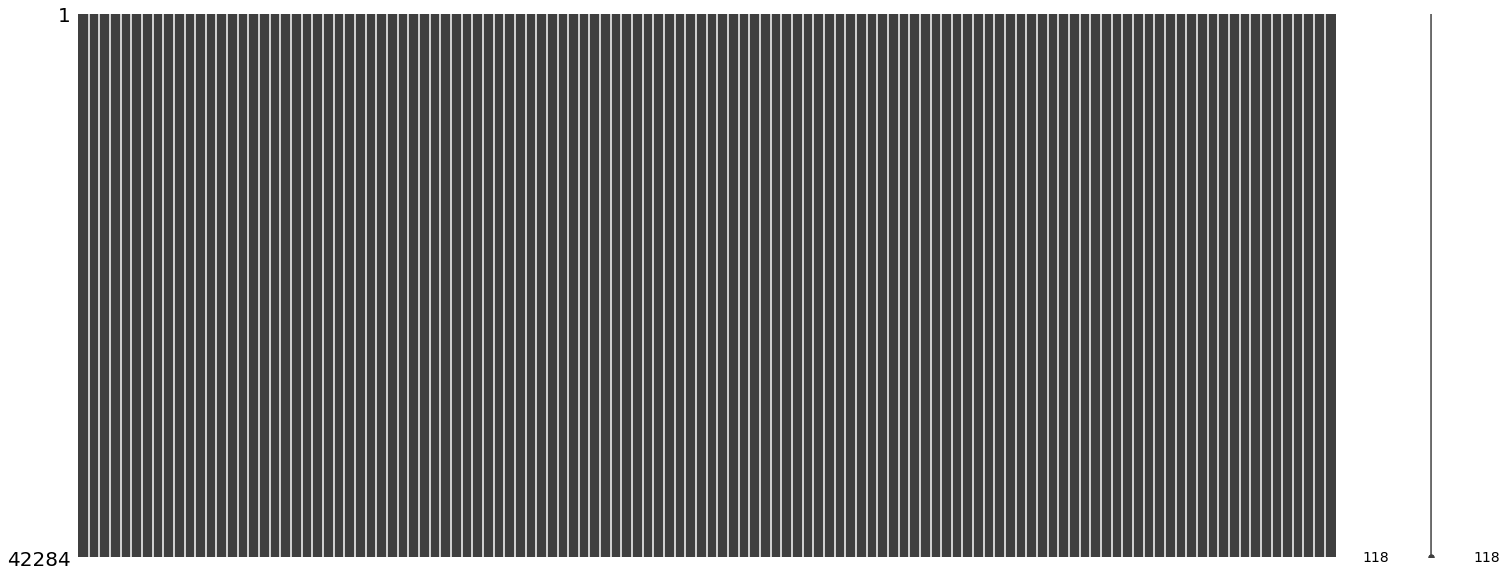

In [27]:
msno.matrix(clean_df)

In [28]:
pd.options.display.max_rows = 80

In [29]:
display(clean_df)

,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMCcomimputações,Excessodepesocomimputações,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta/dia-Semsuco,ContagemfrutaTOTAL/dia,ContagemfrutaehortaliçaTOTAL/dia,Consumorecomendadodefrutasehortaliças,Consumoregularderefrigerantes(5xoumais/Sem),Consumoregulardefeijao(5xoumais/Sem),score_sf,Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas,score_upp,Consumodecincooumaisgruposdealimentosultraprocessados,Tipo atv. fis. no tempo livre (lazer),Frequenciaderealizacaodeatv.fis.notempolivre(lazer),Tempo de realizacao de atv. fis. no tempo livre (lazer),af*freq*time (continua),Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012),Atividadefisicanodeslocamento,Atividadefisicanotrabalhodomestico,Atividadefisicanotrabalho,Inatividadefisica,Duração diária do deslocamento para trabalho (min),Duração diária do deslocamento para o escola (min),Duração diária do deslocamento para o trabalho e escola (min),Duração semanal do deslocamento para o trabalho e escola (min),Duração semanal da atividade física laboral (min),Duração semanal da atividade física doméstica(min),Atividade física >= 150min/sem em 3 domínios,Atividadefísica<=150min/semem3domínios,HábitodeassistirTV-3hrs/dia,Tempodetela(nãoTV)-3hrs/dia,quantas horas assiste tv / dia,Tempodetela(TOTAL)-3hrs/dia,Consumoabusivodealcool,Avaliaçãoruimdacondiçãodesaúde,Hipertensaoarterial,Diabetes
2,10,68,1,1,3,777,180,1,1,4,2,2.0,1.0,1,2,1,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,3.0,2.0,3,1.0,2.0,4,4,2,2,1,1,1,1,1,2,2,2,6,6,1,67,180,0,0,0,0,0,20.679012,0,0,0,0,0,1,1,2,1,1,2,4,0,0,1,4,0,1,0,0,0.0,0.0,0.00,0,0,0,1,0,0.0,0.0,0.0,0.0,1800,0,1,0,0,0,2.5,0,0,0,1,1
3,10,79,1,1,3,62,170,1,1,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2,3,3.0,2.0,3,1.0,1.0,4,1,2,2,2,1,2,1,3,2,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,2.5,0,0,0,0,

In [30]:
display(clean_df[(clean_df != 777)])

,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMCcomimputações,Excessodepesocomimputações,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta/dia-Semsuco,ContagemfrutaTOTAL/dia,ContagemfrutaehortaliçaTOTAL/dia,Consumorecomendadodefrutasehortaliças,Consumoregularderefrigerantes(5xoumais/Sem),Consumoregulardefeijao(5xoumais/Sem),score_sf,Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas,score_upp,Consumodecincooumaisgruposdealimentosultraprocessados,Tipo atv. fis. no tempo livre (lazer),Frequenciaderealizacaodeatv.fis.notempolivre(lazer),Tempo de realizacao de atv. fis. no tempo livre (lazer),af*freq*time (continua),Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012),Atividadefisicanodeslocamento,Atividadefisicanotrabalhodomestico,Atividadefisicanotrabalho,Inatividadefisica,Duração diária do deslocamento para trabalho (min),Duração diária do deslocamento para o escola (min),Duração diária do deslocamento para o trabalho e escola (min),Duração semanal do deslocamento para o trabalho e escola (min),Duração semanal da atividade física laboral (min),Duração semanal da atividade física doméstica(min),Atividade física >= 150min/sem em 3 domínios,Atividadefísica<=150min/semem3domínios,HábitodeassistirTV-3hrs/dia,Tempodetela(nãoTV)-3hrs/dia,quantas horas assiste tv / dia,Tempodetela(TOTAL)-3hrs/dia,Consumoabusivodealcool,Avaliaçãoruimdacondiçãodesaúde,Hipertensaoarterial,Diabetes
2,10,68,1,1.0,3,NaN,180.0,1,1,4,2,2.0,1.0,1,2,1,1,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,3.0,2.0,3,1.0,2.0,4,4.0,2,2.0,1.0,1.0,1.0,1.0,1,2.0,2,2,6,6,1,67,180,0,0,0,0,0,20.679012,0,0,0,0,0,1,1,2,1,1,2,4,0,0,1,4,0,1,0,0,0.0,0.0,0.00,0,0,0,1,0,0.0,0.0,0.0,0.0,1800,0,1,0,0,0,2.5,0,0,0,1,1
3,10,79,1,1.0,3,62.0,170.0,1,1,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2,3,3.0,2.0,3,1.0,1.0,4,1.0,2,2.0,2.0,1.0,2.0,1.0,3,2.0,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.

In [31]:
clean777 = clean_df[(clean_df != 777)].dropna()

In [32]:
clean888 = clean777[(clean777 != 888)].dropna()

In [33]:
display(clean888)

,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMCcomimputações,Excessodepesocomimputações,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta/dia-Semsuco,ContagemfrutaTOTAL/dia,ContagemfrutaehortaliçaTOTAL/dia,Consumorecomendadodefrutasehortaliças,Consumoregularderefrigerantes(5xoumais/Sem),Consumoregulardefeijao(5xoumais/Sem),score_sf,Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas,score_upp,Consumodecincooumaisgruposdealimentosultraprocessados,Tipo atv. fis. no tempo livre (lazer),Frequenciaderealizacaodeatv.fis.notempolivre(lazer),Tempo de realizacao de atv. fis. no tempo livre (lazer),af*freq*time (continua),Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012),Atividadefisicanodeslocamento,Atividadefisicanotrabalhodomestico,Atividadefisicanotrabalho,Inatividadefisica,Duração diária do deslocamento para trabalho (min),Duração diária do deslocamento para o escola (min),Duração diária do deslocamento para o trabalho e escola (min),Duração semanal do deslocamento para o trabalho e escola (min),Duração semanal da atividade física laboral (min),Duração semanal da atividade física doméstica(min),Atividade física >= 150min/sem em 3 domínios,Atividadefísica<=150min/semem3domínios,HábitodeassistirTV-3hrs/dia,Tempodetela(nãoTV)-3hrs/dia,quantas horas assiste tv / dia,Tempodetela(TOTAL)-3hrs/dia,Consumoabusivodealcool,Avaliaçãoruimdacondiçãodesaúde,Hipertensaoarterial,Diabetes
3,10,79,1,1.0,3,62.0,170.0,1.0,1.0,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2.0,3,3.0,2.0,3,1.0,1.0,4,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,2.5,0,0,0,0,0
4,10,70,1,1.0,3,66.0,162.0,1.0,2.0,4,2,2.0,2.0,1,2,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,1,1,2.0,1,2.0,2.0,3,3.0,1.0,4,80.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3,3,6,6,1,66,162,0,0,1,0,0,25.148605,1,0,0,0,0,1,1,2,1,2,3,5,0,0,1,5,1,3,0,1,3.5,34

In [34]:
clean888.reset_index(inplace=True)

In [35]:
for i in clean888:
    print(i)


index
cidade
idade_anos
sexo
escolaridade_grau
anos_estudo
peso_kg
altura_cm
possui_cnh
dirige
dias_por_sem_feijao
dias_por_sem_hortalica
dias_por_sem_hortalica_crua
dias_por_sem_hortalica_cozida
copos_suco_natural_por_dia
dias_por_sem_frutas
dias_por_sem_refrigerante
ontem_alface_couve_brocolis_agriao_espinafre
ontem_abobora_cenoura_batata-doce_quiabo
ontem_mamao_manga_melao_amarelo_pequi
ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba
ontem_laranja_banana_maca_abacaxi
ontem_arroz_macarrao_polenta_cuscuz_milho_verde
ontem_feijao_ervilh_lentilha_graodebico
ontem_batata_comum_mandioca_cara_inhame
ontem_carneboi_porco_frango_peixe
ontem_ovo_frito_cozido_mexido
ontem_leite
ontem_amendoim_castanhacaju_castanhapara
ontem_refrigerante
ontem_suco_caixinha
ontem_refresco_po
ontem_bebida_achocolatada
ontem_iogurte_sabor
ontem_chips_bolacha_salgada
ontem_bolacha_doce_biscoito_recheado_bolinho_pacote
ontem_chocolate_sorvete_gelatina_flan
ontem_salsicha_linguica_mortadela_presunto
ontem_p

In [36]:
new_headers = {'bebidaalcoólica': 'ingere_bebida_alcoolica', 
               'Faixaetária': 'faixa_etaria',
               'peso(kg)-valoresimputados': 'peso_imputado',
               'altura(cm)-valoresimputados': 'altura_imputada',
               'Fumantes': 'fumantes',
               'Consumode20oumaiscigarrosaodia': 'consumo_mais_20_cigarros_dia',
               'Fumantespassivosnodomicilio': 'fumante_passivo_casa',
               'Fumantespassivosnolocaldetrabalho': 'fumante_passivo_trab',
               'IMCcomimputações': 'IMC',
                'Excessodepesocomimputações': 'excesso_peso',
                'Obesidadecomimputações': 'obesidade',
                'Consumoregulardehortaliças(5xoumais/Sem)': 'consumo_reg_hortalicas',
                'Consumoregulardefrutas(5xoumais/Sem)': 'consumo_reg_frutas',
                'ConsumoregulardefrutasEhortaliças(5xoumais/Sem)': 'consumo_reg_frutas_hortalicas',
                'Contagemdehortaliçascruas/dia': 'hortalica_crua_dia',
                'Contagemdehortaliçascozidas/dia':'hortalica_cozida_dia',
                'Contagemdehortaliças/dia': 'hortalica_dia',
                'Contagemsuco/dia-Máx.1/dia': 'suco_dia',
                'Contagemfruta/dia-Semsuco':  'fruta_dia',
                'ContagemfrutaTOTAL/dia': 'fruta_total_dia',
                'ContagemfrutaehortaliçaTOTAL/dia': 'fruta_hortalica_dia',
                'Consumorecomendadodefrutasehortaliças': 'consumo_reg_fruta_hortalica',
                'Consumoregularderefrigerantes(5xoumais/Sem)': 'consumo_reg_refrigerantes',
                'Consumoregulardefeijao(5xoumais/Sem)':  'consumo_reg_feijao',
                'Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas': 'consumo_nao_processados_prev_doencas_cronicas',
                'Consumodecincooumaisgruposdealimentosultraprocessados': 'consumo_ultraprocessados',
                'Tipo atv. fis. no tempo livre (lazer)': 'tipo_atv_fisica_tempo_livre',
                'Frequenciaderealizacaodeatv.fis.notempolivre(lazer)': 'frequencia_tv_tempo_livre',
                'Tempo de realizacao de atv. fis. no tempo livre (lazer)': 'tempo_atv_fisia_tempo_livre',
                'af*freq*time (continua)': 'af_freq_time',
                'Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012)': 'atividade_fisica_suficiente_tempo_livre',
                'Atividadefisicanodeslocamento': 'atividade_fisica_desloc',
                'Atividadefisicanotrabalhodomestico': 'atividade_fisica_trab_domestico',
                'Atividadefisicanotrabalho': 'atividade_fisica_trabalho',
                'Inatividadefisica': 'inatividade_fisica',
                'Duração diária do deslocamento para trabalho (min)': 'tempo_deslocamento_trab_diario',
                'Duração diária do deslocamento para o escola (min)': 'tempo_deslocamento_escola_diario',
                'Duração diária do deslocamento para o trabalho e escola (min)': 'tempo_deslocamento_trab_escola_diario',
                'Duração semanal do deslocamento para o trabalho e escola (min)': 'tempo_deslocamento_trab_semanal',
                'Duração semanal da atividade física laboral (min)': 'atividade_fisica_laboral_semanal',
                'Duração semanal da atividade física doméstica(min)': 'atividade_fisica_domestica_semanal',
                'Atividade física >= 150min/sem em 3 domínios': 'atv_fisica_3_dominios_maior150min',
                'Atividadefísica<=150min/semem3domínios': 'atv_fisica_3_dominios_menor150min',
                'HábitodeassistirTV-3hrs/dia': 'habito_tv_3horas_dia',
                'Tempodetela(nãoTV)-3hrs/dia': 'tempo_tela_dia',
                'quantas horas assiste tv / dia': 'tempo_tv_dia',
                'Tempodetela(TOTAL)-3hrs/dia': 'tempo_tela_total',
                'Consumoabusivodealcool': 'consumo_abusivo_alcool',
                'Avaliaçãoruimdacondiçãodesaúde': 'avaliacao_ruim_saude',
                'Hipertensaoarterial': 'hipertensao_arterial',
                'Diabetes': 'diabetes'

               }
new_headers

{'bebidaalcoólica': 'ingere_bebida_alcoolica',
 'Faixaetária': 'faixa_etaria',
 'peso(kg)-valoresimputados': 'peso_imputado',
 'altura(cm)-valoresimputados': 'altura_imputada',
 'Fumantes': 'fumantes',
 'Consumode20oumaiscigarrosaodia': 'consumo_mais_20_cigarros_dia',
 'Fumantespassivosnodomicilio': 'fumante_passivo_casa',
 'Fumantespassivosnolocaldetrabalho': 'fumante_passivo_trab',
 'IMCcomimputações': 'IMC',
 'Excessodepesocomimputações': 'excesso_peso',
 'Obesidadecomimputações': 'obesidade',
 'Consumoregulardehortaliças(5xoumais/Sem)': 'consumo_reg_hortalicas',
 'Consumoregulardefrutas(5xoumais/Sem)': 'consumo_reg_frutas',
 'ConsumoregulardefrutasEhortaliças(5xoumais/Sem)': 'consumo_reg_frutas_hortalicas',
 'Contagemdehortaliçascruas/dia': 'hortalica_crua_dia',
 'Contagemdehortaliçascozidas/dia': 'hortalica_cozida_dia',
 'Contagemdehortaliças/dia': 'hortalica_dia',
 'Contagemsuco/dia-Máx.1/dia': 'suco_dia',
 'Contagemfruta/dia-Semsuco': 'fruta_dia',
 'ContagemfrutaTOTAL/dia': 'fru

In [37]:
clean = clean888.rename(columns=new_headers)

In [38]:
clean888.drop('index', axis=1)

,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoólica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,Faixaetária,Categorias(idade|sexo)paraimputaçãodaescolaridade,Faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,Fumantes,Consumode20oumaiscigarrosaodia,Fumantespassivosnodomicilio,Fumantespassivosnolocaldetrabalho,eletronico,IMCcomimputações,Excessodepesocomimputações,Obesidadecomimputações,Consumoregulardehortaliças(5xoumais/Sem),Consumoregulardefrutas(5xoumais/Sem),ConsumoregulardefrutasEhortaliças(5xoumais/Sem),Contagemdehortaliçascruas/dia,Contagemdehortaliçascozidas/dia,Contagemdehortaliças/dia,Contagemsuco/dia-Máx.1/dia,Contagemfruta/dia-Semsuco,ContagemfrutaTOTAL/dia,ContagemfrutaehortaliçaTOTAL/dia,Consumorecomendadodefrutasehortaliças,Consumoregularderefrigerantes(5xoumais/Sem),Consumoregulardefeijao(5xoumais/Sem),score_sf,Consumodecincooumaisgruposdealimentosnãoouminimamenteprocessadosprotetoresparadoençascrônicas,score_upp,Consumodecincooumaisgruposdealimentosultraprocessados,Tipo atv. fis. no tempo livre (lazer),Frequenciaderealizacaodeatv.fis.notempolivre(lazer),Tempo de realizacao de atv. fis. no tempo livre (lazer),af*freq*time (continua),Atividadefísicasuficientenolazer-SOMENTETEMPO/SEMFREQUENCIA(apartirde2012),Atividadefisicanodeslocamento,Atividadefisicanotrabalhodomestico,Atividadefisicanotrabalho,Inatividadefisica,Duração diária do deslocamento para trabalho (min),Duração diária do deslocamento para o escola (min),Duração diária do deslocamento para o trabalho e escola (min),Duração semanal do deslocamento para o trabalho e escola (min),Duração semanal da atividade física laboral (min),Duração semanal da atividade física doméstica(min),Atividade física >= 150min/sem em 3 domínios,Atividadefísica<=150min/semem3domínios,HábitodeassistirTV-3hrs/dia,Tempodetela(nãoTV)-3hrs/dia,quantas horas assiste tv / dia,Tempodetela(TOTAL)-3hrs/dia,Consumoabusivodealcool,Avaliaçãoruimdacondiçãodesaúde,Hipertensaoarterial,Diabetes
0,10,79,1,1.0,3,62.0,170.0,1.0,1.0,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2.0,3,3.0,2.0,3,1.0,1.0,4,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,2.5,0,0,0,0,0
1,10,70,1,1.0,3,66.0,162.0,1.0,2.0,4,2,2.0,2.0,1,2,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,1,1,2.0,1,2.0,2.0,3,3.0,1.0,4,80.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3,3,6,6,1,66,162,0,0,1,0,0,25.148605,1,0,0,0,0,1,1,2,1,2,3,5,0,0,1,5,1,3,0,1,3.5,34

In [39]:
counter = 0
for i in clean:
    print(f'{counter}: {i}')
    counter += 1

0: index
1: cidade
2: idade_anos
3: sexo
4: escolaridade_grau
5: anos_estudo
6: peso_kg
7: altura_cm
8: possui_cnh
9: dirige
10: dias_por_sem_feijao
11: dias_por_sem_hortalica
12: dias_por_sem_hortalica_crua
13: dias_por_sem_hortalica_cozida
14: copos_suco_natural_por_dia
15: dias_por_sem_frutas
16: dias_por_sem_refrigerante
17: ontem_alface_couve_brocolis_agriao_espinafre
18: ontem_abobora_cenoura_batata-doce_quiabo
19: ontem_mamao_manga_melao_amarelo_pequi
20: ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba
21: ontem_laranja_banana_maca_abacaxi
22: ontem_arroz_macarrao_polenta_cuscuz_milho_verde
23: ontem_feijao_ervilh_lentilha_graodebico
24: ontem_batata_comum_mandioca_cara_inhame
25: ontem_carneboi_porco_frango_peixe
26: ontem_ovo_frito_cozido_mexido
27: ontem_leite
28: ontem_amendoim_castanhacaju_castanhapara
29: ontem_refrigerante
30: ontem_suco_caixinha
31: ontem_refresco_po
32: ontem_bebida_achocolatada
33: ontem_iogurte_sabor
34: ontem_chips_bolacha_salgada
35: ontem_

In [40]:
clean = clean.rename(columns={clean.columns[47]: 'horas_tv_dia', clean.columns[51]: 'contato_fumante_casa', clean.columns[65]: 'categoria_imputacao_escolaridade', clean.columns[66]: 'faixa_escolaridade', clean.columns[94]: 'tipo_atv_fisica_lazer', clean.columns[97]: 'af*freq*time'})

In [41]:
display(clean)

,index,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,ingere_bebida_alcoolica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,horas_tv_dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contato_fumante_casa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes,ultima_afericao_glicemia,possedeplanodesaúde,recebe_bolsa_familia,moradores,adultos,faixa_etaria,categoria_imputacao_escolaridade,faixa_escolaridade,peso_imputado,altura_imputada,fumantes,consumo_mais_20_cigarros_dia,fumante_passivo_casa,fumante_passivo_trab,eletronico,IMC,excesso_peso,obesidade,consumo_reg_hortalicas,consumo_reg_frutas,consumo_reg_frutas_hortalicas,hortalica_crua_dia,hortalica_cozida_dia,hortalica_dia,suco_dia,fruta_dia,fruta_total_dia,fruta_hortalica_dia,consumo_reg_fruta_hortalica,consumo_reg_refrigerantes,consumo_reg_feijao,score_sf,consumo_nao_processados_prev_doencas_cronicas,score_upp,consumo_ultraprocessados,tipo_atv_fisica_lazer,frequencia_tv_tempo_livre,tempo_atv_fisia_tempo_livre,af*freq*time,atividade_fisica_suficiente_tempo_livre,atividade_fisica_desloc,atividade_fisica_trab_domestico,atividade_fisica_trabalho,inatividade_fisica,tempo_deslocamento_trab_diario,tempo_deslocamento_escola_diario,tempo_deslocamento_trab_escola_diario,tempo_deslocamento_trab_semanal,atividade_fisica_laboral_semanal,atividade_fisica_domestica_semanal,atv_fisica_3_dominios_maior150min,atv_fisica_3_dominios_menor150min,habito_tv_3horas_dia,tempo_tela_dia,tempo_tv_dia,tempo_tela_total,consumo_abusivo_alcool,avaliacao_ruim_saude,hipertensao_arterial,diabetes
0,3,10,79,1,1.0,3,62.0,170.0,1.0,1.0,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2.0,3,3.0,2.0,3,1.0,1.0,4,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,2.5,0,0,0,0,0
1,4,10,70,1,1.0,3,66.0,162.0,1.0,2.0,4,2,2.0,2.0,1,2,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,1,1,2.0,1,2.0,2.0,3,3.0,1.0,4,80.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3,3,6,6,1,66,162,0,0,1,0,0,25.148605,1,0,0,0,0,1,1,2,1,2,3,5,0,0,1,5,1,3,0,1,3.5,34.5,120.75,0,1,1,1,0,44.5,0.0,44.5,222.5,0,50,1,0,0,0,1.5,0,0,0,0,0
2,6,10,70,1,4.0,3,85.0,182.0,2.0,2.0,3,3,3.0,2.0,5,2,2,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,1,2,2.0,3,1.0,2.0,3,2.0,2.0,4,4.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2,2,6,6,1,85,182,0,0,0,0,0,25.661152,1,0,1,0,0,2,2,4,0,3,3,7,0,0,1,2,0,2,0,1,3.5,60.0,210.00,1,0,0,0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1.0,0,0,0,1,1
3,7,10,73,1,1.0,3,178.0,166.0,2.0,2.0,4,1,6.0,5.0,5,1,6,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2.0,3,5.0,2.0,3,3.0,2.0,4,80.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2,2,6,6,1,178,166,0,0,0,0,0,64.595734,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,3,0,1,0,1,1.5,44.5,66.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,

In [42]:
clean_df.reset_index(inplace=True)

In [44]:
counter = 0
for i in clean:
    print(f'{counter}: {i}')
    counter += 1

0: index
1: cidade
2: idade_anos
3: sexo
4: escolaridade_grau
5: anos_estudo
6: peso_kg
7: altura_cm
8: possui_cnh
9: dirige
10: dias_por_sem_feijao
11: dias_por_sem_hortalica
12: dias_por_sem_hortalica_crua
13: dias_por_sem_hortalica_cozida
14: copos_suco_natural_por_dia
15: dias_por_sem_frutas
16: dias_por_sem_refrigerante
17: ontem_alface_couve_brocolis_agriao_espinafre
18: ontem_abobora_cenoura_batata-doce_quiabo
19: ontem_mamao_manga_melao_amarelo_pequi
20: ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba
21: ontem_laranja_banana_maca_abacaxi
22: ontem_arroz_macarrao_polenta_cuscuz_milho_verde
23: ontem_feijao_ervilh_lentilha_graodebico
24: ontem_batata_comum_mandioca_cara_inhame
25: ontem_carneboi_porco_frango_peixe
26: ontem_ovo_frito_cozido_mexido
27: ontem_leite
28: ontem_amendoim_castanhacaju_castanhapara
29: ontem_refrigerante
30: ontem_suco_caixinha
31: ontem_refresco_po
32: ontem_bebida_achocolatada
33: ontem_iogurte_sabor
34: ontem_chips_bolacha_salgada
35: ontem_

In [45]:
clean_df.to_feather('/Users/rafaelalvesferreira/Docs_locais/Projetos/Vigitel_predictions/data/interim/cleaned_data.ftr')